# Draw Center pie

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


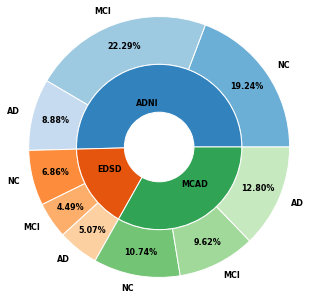

In [2]:
import draw_center_summary
draw_center_summary.write_center_count(csv_path='./data/center_info/count.csv')
draw_center_summary.pie_plot(text_size=8)

# Draw Top n meta analysis result

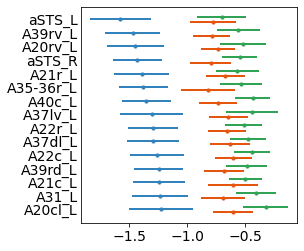

In [7]:
import meta_roi
import draw_results
from mask import Mask, NiiMask

from matplotlib import cm
import matplotlib.pyplot as plt

#Define ROI Mask
mask_path = './data/mask/rBN_Atlas_246_1mm.nii'
mask = NiiMask(mask_path)

plot_gmv_top = False
plot_ct_top = True
if plot_gmv_top:
    main_models = meta_roi.meta_gmv(2, 0, mask, save_nii=False)
    sub_models_list = []
    sub_models1 = meta_roi.meta_gmv(2, 1, mask, save_nii=False)
    sub_models2 = meta_roi.meta_gmv(1, 0, mask, save_nii=False)
    sub_models_list.append(sub_models1)
    sub_models_list.append(sub_models2)
elif plot_ct_top:
    main_models = meta_roi.meta_ct(2, 0, mask, save_nii=False, save_gii=False)
    sub_models_list = []
    sub_models1 = meta_roi.meta_ct(2, 1, mask, save_nii=False, save_gii=False)
    sub_models2 = meta_roi.meta_ct(1, 0, mask, save_nii=False, save_gii=False)
    sub_models_list.append(sub_models1)
    sub_models_list.append(sub_models2)

cmap = cm.get_cmap(plt.get_cmap('tab20c'))
draw_results.draw_top(main_models, sub_models_list, cmap=cmap,
                      cmap_start=0,
                    legend_names=None,
                    offset=0.2, width_ratio=0.2, height_ratio=0.2,
                    linewidth=2, point_size=10, fontsize=14,
                    topn=15, box_aspect=None, value_aspect='auto',
                    id_csv_path='./data/mask/cortical_id_new.csv')

# Plot CSEA result radar plot

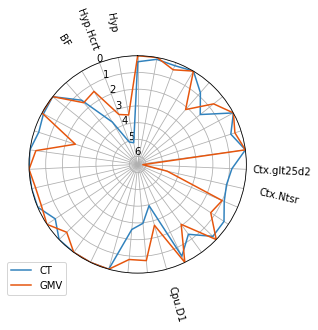

E:\workspace\AD_meta\draw_results.py:452: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  ax.set_yticklabels(y_labels, {'fontsize': 10}, ha='right')


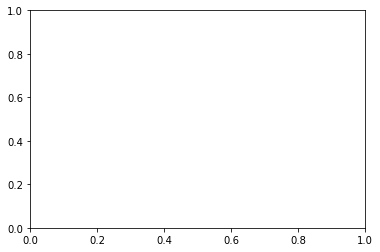

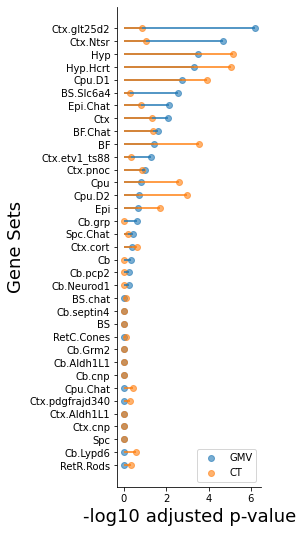

In [4]:
import os
import draw_results
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt

dirr = r'E:\workspace\tesa\results\CESA'
out_path = os.path.join(dirr, 'radar.png')
files = os.listdir(dirr)
dfs = []
legend_names = []

for f in files:
    if '.csv' in f:
        dfs.append(pd.read_csv(os.path.join(dirr, f), index_col=0))
        legend_names.append(f[:-4])
        
cmap = cm.get_cmap(plt.get_cmap('tab20c'))
draw_results.radar_plot(dfs, col_name='0.05 - adjusted',
                        cmap=cmap,
                        p_thres=0.001,
                        legend_names=legend_names,
                        legend_loc=(-.1, -.1),
                        save=True,
                        out_path=out_path)
draw_results.draw_stem(fig_width=2, fig_height=6.67)

In [1]:
import pandas as pd
df1 = pd.read_csv('./results/gene/2_0/GO_GMV_05/enrichment_results.txt', sep="\t", index_col=1)
df2 = pd.read_csv('./results/gene/2_0/GO_CT_05/enrichment_results.txt',  sep="\t",index_col=1)
df = df1.merge(df2, how='inner', left_on='description', right_on='description',
          suffixes=('_gmv', '_ct'))
df = df.fillna(10)
df = df.sort_values('FDR_gmv', ascending=False)

In C:\Users\Dunge\Anaconda3\envs\meta\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Dunge\Anaconda3\envs\meta\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Dunge\Anaconda3\envs\meta\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Dunge\Anaconda3\envs\meta\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Dunge\Anaconda3\envs\meta\lib\site-packa

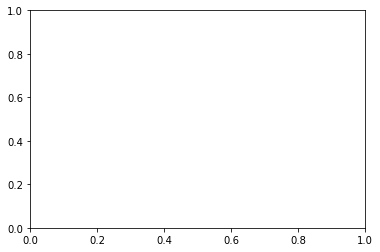

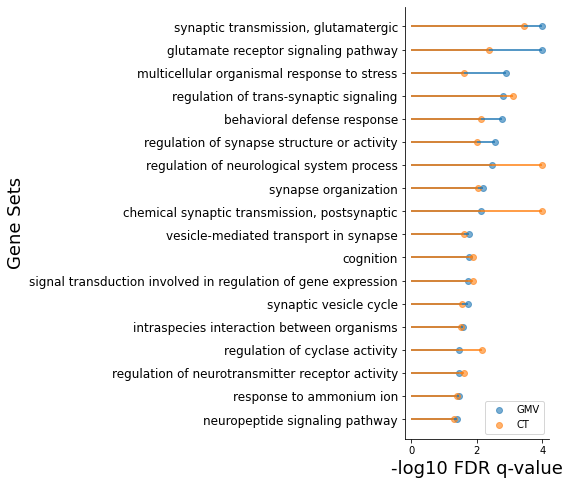

In [2]:
import numpy as np
import matplotlib.pyplot as plt
fontsize=18
alpha=0.6
fig_width=2
fig_height=6

y = range(0, len(df.index))
values = -np.log10(df['FDR_gmv'].to_numpy())
sub_values = -np.log10(df['FDR_ct'].to_numpy())
values[values==np.inf] = 4
sub_values[sub_values==np.inf] = 4
values[values==-1] = 0
sub_values[sub_values==-1] = 0
y_labels = df.index.to_numpy().tolist()

fig, ax = plt.subplots()
fig = plt.figure(figsize=(fig_width, fig_height))
ax = fig.add_axes([0, 0, 1, 1])

ax.scatter(x=values, y=y, label='GMV', alpha=alpha)
ax.hlines(y=y, xmin=0, xmax=values)
ax.scatter(x=sub_values, y=y, label='CT', alpha=alpha)
ax.hlines(y=y, xmin=0, xmax=sub_values, color='C1')

ax.set_yticks(y)
ax.set_yticklabels(y_labels, {'fontsize': 12}, ha='right')
ax.set_xlabel('-log10 FDR q-value', fontsize=fontsize)
ax.set_ylabel('Gene Sets', fontsize=fontsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.draw()

ax.legend(loc="lower right")
plt.show()
plt.close()

d:\software\conda\envs\sklearn\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
d:\software\conda\envs\sklearn\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


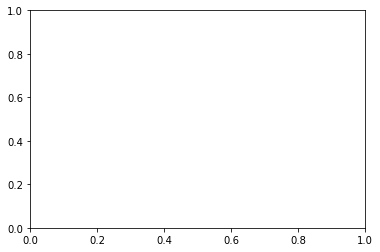

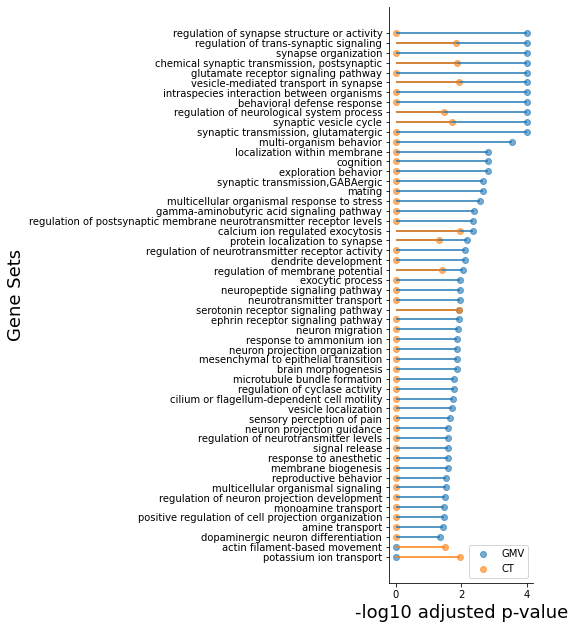

In [2]:
import pandas as pd
df1 = pd.read_csv(r'./results\mixedLM\gene\webGestalt\GO_Bio_05_gmv\enrichment_results.csv', index_col=1)
df2 = pd.read_csv(r'./results\mixedLM\gene\webGestalt\GO_Bio_05_ct\enrichment_results.csv', index_col=1)
df = df1.merge(df2, how='outer', left_on='description', right_on='description',
          suffixes=('_gmv', '_ct'))
df = df.fillna(10)
df = df.sort_values('FDR_gmv', ascending=False)

import numpy as np
import matplotlib.pyplot as plt
fontsize=18
alpha=0.6
fig_width=2
fig_height=8

y = range(0, len(df.index))
values = -np.log10(df['FDR_gmv'].to_numpy())
sub_values = -np.log10(df['FDR_ct'].to_numpy())
values[values==np.inf] = 4
sub_values[sub_values==np.inf] = 4
values[values==-1] = 0
sub_values[sub_values==-1] = 0
y_labels = df.index.to_numpy().tolist()

fig, ax = plt.subplots()
fig = plt.figure(figsize=(fig_width, fig_height))
ax = fig.add_axes([0, 0, 1, 1])

ax.scatter(x=values, y=y, label='GMV', alpha=alpha)
ax.hlines(y=y, xmin=0, xmax=values)
ax.scatter(x=sub_values, y=y, label='CT', alpha=alpha)
ax.hlines(y=y, xmin=0, xmax=sub_values, color='C1')

ax.set_yticks(y)
ax.set_yticklabels(y_labels, {'fontsize': 10}, ha='right')
ax.set_xlabel('-log10 adjusted p-value', fontsize=fontsize)
ax.set_ylabel('Gene Sets', fontsize=fontsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.draw()

ax.legend(loc="lower right")
plt.show()
plt.close()

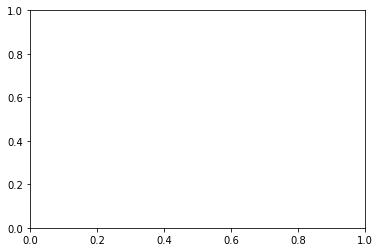

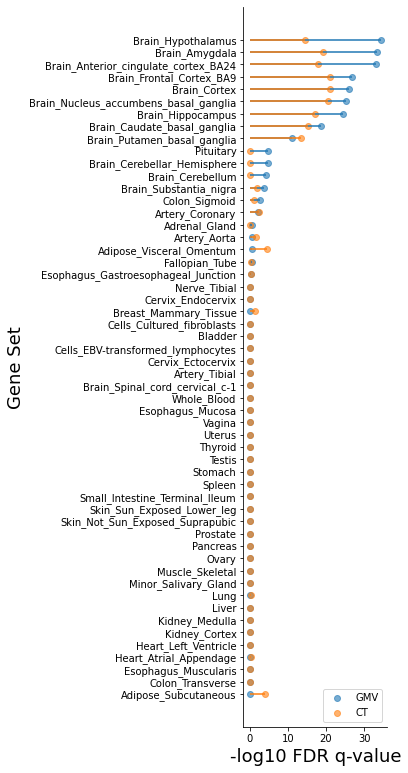

In [11]:
import draw_results

draw_results.draw_fuma_stem(csv_path='./results/gene/2_0/FUMA_GMV_150/gtex_v8_ts_DEG.csv',
                            sub_csv_path='./results/gene/2_0/FUMA_CT_150/gtex_v8_ts_DEG.csv',
                            cate='DEG.up', 
                            fig_width=2, fig_height=10)

D:\Software\conda\envs\meta\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


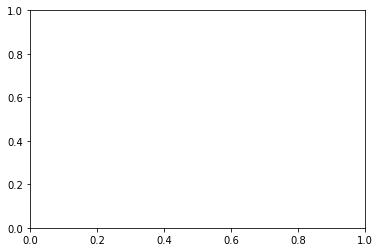

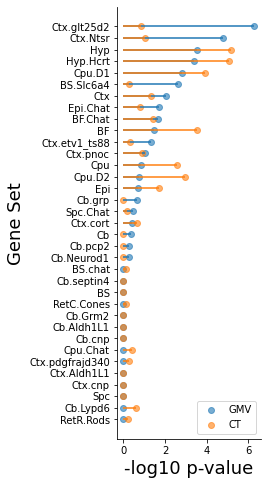

In [15]:
import numpy as np
topn=10
fontsize=18
alpha=0.6
fig_width=2
fig_height=6
csv_path =  r'./results/gene/2_0/CSEA/GMV.csv'
sub_csv_path =  r'./results/gene/2_0/CSEA/CT.csv'

df = pd.read_csv(csv_path, index_col=0)
df = df.sort_values('0.05 - adjusted', ascending=False)

sub_df = pd.read_csv(sub_csv_path, index_col=0)
sub_df = sub_df.loc[df.index]

y = range(0, len(df.index))
values = -np.log10(df['0.05 - adjusted'].to_numpy())
sub_values = -np.log10(sub_df['0.05 - adjusted'].to_numpy())
y_labels = df.index.to_numpy().tolist()

fig, ax = plt.subplots()
fig = plt.figure(figsize=(fig_width, fig_height))
ax = fig.add_axes([0, 0, 1, 1])

ax.scatter(x=values, y=y, label='GMV', alpha=alpha)
ax.hlines(y=y, xmin=0, xmax=values)
ax.scatter(x=sub_values, y=y, label='CT', alpha=alpha)
ax.hlines(y=y, xmin=0, xmax=sub_values, color='C1')

ax.set_yticks(y)
ax.set_yticklabels(y_labels, {'fontsize': 10}, ha='right')
ax.set_xlabel('-log10 p-value', fontsize=fontsize)
ax.set_ylabel('Gene Set', fontsize=fontsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.draw()

ax.legend(loc="lower right")
plt.show()
plt.close()

# Plot MMSE boxplot

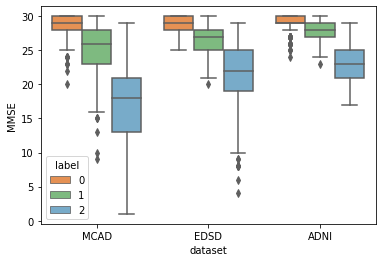

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import mixed_lm

palette = ['#fd8d3c', '#74c476', '#6baed6']
df = pd.read_csv(r'E:\workspace\AD_meta\results\mixedLM\df.csv', index_col=0)
sns.boxplot(x="dataset", y="MMSE", hue="label",
                data=df, palette=palette)
plt.show()

# draw Center pieplot

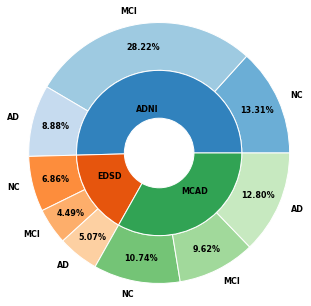

In [14]:
import draw_center_summary
draw_center_summary.write_center_count()
draw_center_summary.pie_plot(text_size=8)

In [3]:
import datasets
import draw_center_summary
centers = datasets.load_centers_mcad()


In [11]:
import numpy as np
males, females, ages, mmses, csfs, gmvs, wmvs, tivs = draw_center_summary.get_all(centers,2)
print(males)
print(females)
print('{:.2f}'.format(np.mean(ages)))
print('{:.2f}'.format(np.std(ages)))
print('{:.2f}'.format(np.mean(mmses)))
print('{:.2f}'.format(np.std(mmses)))
print('{:.2f}'.format(np.mean(csfs)))
print('{:.2f}'.format(np.std(csfs)))
print('{:.2f}'.format(np.mean(gmvs)))
print('{:.2f}'.format(np.std(gmvs)))
print('{:.2f}'.format(np.mean(wmvs)))
print('{:.2f}'.format(np.std(wmvs)))
print('{:.2f}'.format(np.mean(tivs)))
print('{:.2f}'.format(np.std(tivs)))

154.0
245.0
69.23
9.15
16.67
5.96
459.67
96.60
524.46
63.47
442.93
57.27
1430.56
141.69


# correlation between 5HT1a and Abeta

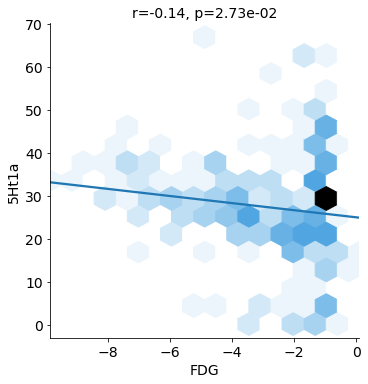

In [4]:
import pandas as pd
import abeta_pet
import pet_fdg
import draw_results

label_pairs = [(2, 0)]

df = pd.read_csv(r'H:\workspace\AD_meta\data\PET\masked_mean\5HT1a_WAY_HC36.csv', index_col=0)
#df = pd.read_csv(r'H:\workspace\AD_meta\data\PET\masked_mean\5HT1b_P943_HC22.csv', index_col=0)

values2_dict = df['Volume'].to_dict()

for label_pair in label_pairs:
    label_eg = label_pair[0]
    label_cg = label_pair[1]

    
    abeta_t, _ = abeta_pet.ttest_by_label(label_eg, label_cg)
    fdg_t, _ =  pet_fdg.ttest_by_label(label_eg, label_cg)

    v1 = []
    v2 = []
    # select one
    for key, value1 in fdg_t.items():
        v1.append(value1)
        v2.append(values2_dict[key])

    draw_results.plot_correlation_joint(v1, v2,
                'FDG', '5Ht1a', fontsize=14, show=True,
                save=True, out_path=r'./results/correlation/2_0/ju_1a_FDG.png')

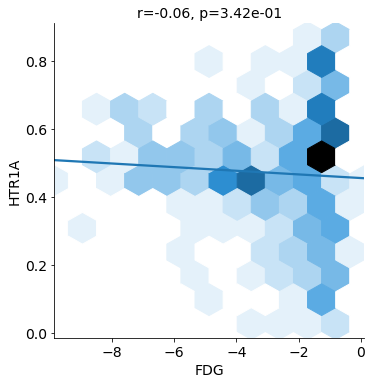

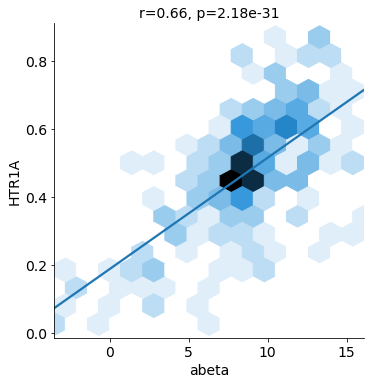

In [16]:
import pandas as pd
import abeta_pet
import pet_fdg
import draw_results

import pandas as pd
df = pd.read_csv('./data/gene/expression.csv', index_col=0)
label_pairs = [(2, 0)]

d = df.T.loc['HTR1A'].to_dict()

for label_pair in label_pairs:
    label_eg = label_pair[0]
    label_cg = label_pair[1]

    abeta_t, _ = abeta_pet.ttest_by_label(label_eg, label_cg)
    fdg_t, _ =  pet_fdg.ttest_by_label(label_eg, label_cg)

    v1 = []
    v2 = []
    for key, value1 in d.items():
        v1.append(value1)
        v2.append(fdg_t[key])

    draw_results.plot_correlation_joint(v2, v1,
                'FDG', 'HTR1A', fontsize=14, show=True,
                save=True, out_path=r'E:\paper\正文\pet\gene-abeta\gene_1a-FDG.png')
    v1 = []
    v2 = []
    for key, value1 in d.items():
        v1.append(value1)
        v2.append(abeta_t[key])

    draw_results.plot_correlation_joint(v2, v1,
                'abeta', 'HTR1A', fontsize=14, show=True,
                save=True, out_path=r'E:\paper\正文\pet\gene-abeta\gene_1a-abeta.png')

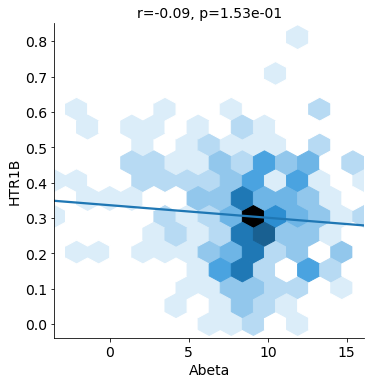

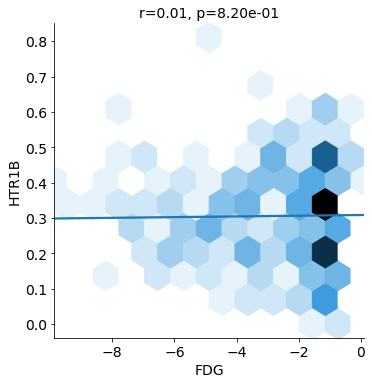

In [17]:
import pandas as pd
import abeta_pet
import pet_fdg
import draw_results

import pandas as pd
df = pd.read_csv('./data/gene/HTR1B.csv', index_col=0)
label_pairs = [(2, 0)]

d = df.T.loc['HTR1B'].to_dict()

for label_pair in label_pairs:
    label_eg = label_pair[0]
    label_cg = label_pair[1]

    abeta_t, _ = abeta_pet.ttest_by_label(label_eg, label_cg)
    fdg_t, _ =  pet_fdg.ttest_by_label(label_eg, label_cg)

    v1 = []
    v2 = []
    for key, value1 in d.items():
        v1.append(value1)
        v2.append(abeta_t[key])

    draw_results.plot_correlation_joint(v2, v1,
                'Abeta', 'HTR1B', fontsize=14, show=True,
                save=True, out_path=r'E:\paper\正文\pet\gene-abeta\gene_1b-abeta.png')

    v1 = []
    v2 = []
    for key, value1 in d.items():
        v1.append(value1)
        v2.append(fdg_t[key])

    draw_results.plot_correlation_joint(v2, v1,
                'FDG', 'HTR1B', fontsize=14, show=True,
                save=True, out_path=r'E:\paper\正文\pet\gene-abeta\gene_1b-FDG.png')

In [1]:
from mask import Mask, NiiMask

import datasets
import pandas as pd

df = pd.read_csv(r'H:\workspace\AD_meta\data\AD\MCAD\AD_S05\roi_gmv_removed\1_NC001.csv', index_col=0)
values = df.to_dict()['GMV']

#Define ROI Mask
mask_path = './data/mask/rBN_Atlas_246_1mm.nii'
mask = NiiMask(mask_path)

mask.save_values(values,'./results/roi_gmv.nii')

ImportError: DLL load failed: 找不到指定的模块。. Module "sklearn" could not be found. See http://nilearn.github.io/introduction.html#installation for installation information.

In [3]:
import pandas as pd

df = pd.read_csv(r'H:\workspace\AD_meta\data\AD\MCAD\AD_S05\roi_gmv_removed\1_NC001.csv', index_col=0)
df.to_dict()['GMV']

{1: 2405.6034129868062,
 2: 2940.033616588885,
 3: 2998.6218467787435,
 4: 2506.4925391746438,
 5: 2304.440543195506,
 6: 2889.2871751647144,
 7: 2177.6565790925592,
 8: 1974.7983166197503,
 9: 2465.6195440440947,
 10: 2241.2897215932603,
 11: 2172.927245655368,
 12: 2762.239531418572,
 13: 2980.8995413485063,
 14: 2624.7595467102733,
 15: 3631.266737824267,
 16: 3543.3369047288024,
 17: 2349.2935516588104,
 18: 2208.713743650661,
 19: 2531.232851931065,
 20: 3229.1175884437416,
 21: 3678.144099955624,
 22: 3092.6363545225067,
 23: 3805.8437279713753,
 24: 2686.3388746938235,
 25: 2329.450219124186,
 26: 2170.6060389175195,
 27: 3081.382963005676,
 28: 2671.9924139006907,
 29: 960.7002381493272,
 30: 1202.298009656015,
 31: 1419.1716905158655,
 32: 1110.1229152461237,
 33: 1051.0292323222798,
 34: 978.9160515860277,
 35: 1464.259597160046,
 36: 984.3170914062517,
 37: 1991.7841156251372,
 38: 1962.3435625154057,
 39: 1086.2726872643605,
 40: 748.5595483245468,
 41: 1950.6381512932992,


# Fig 3 Personal Scores

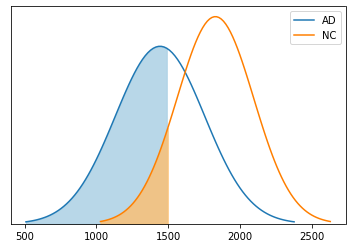

In [3]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ad_path = './data/stats/neurocombat_gmv/AD.csv'
nc_path = './data/stats/neurocombat_gmv/NC.csv'
roi = 217
subject_value = 1500

ad_fill_color = '#a6cee3'
ad_line_color = '#1f78b4'
nc_fill_color = '#fdbf6f'
nc_line_color = '#ff7f00'
fill_alpha = 0.8

# plot AD curve
df = pd.read_csv(ad_path, index_col=0)
mean = df.loc[roi]['mean']
std = df.loc[roi]['std']

fig, ax = plt.subplots()
x = np.linspace(mean - 3*std, mean + 3*std, 100)
y = stats.norm.pdf(x, mean, std)
y2 = np.zeros_like(y)
curve, = ax.plot(x, y, ad_line_color)
curve.set_label('AD')

# plot F(x) for AD
x = [xx if xx<subject_value else 0 for xx in x]
x = np.trim_zeros(x, 'b')
y = y[:np.shape(x)[0]]
y2 = y2[:np.shape(x)[0]]
ax.fill_between(x, y, y2, color=ad_fill_color, alpha=fill_alpha)

# plot NC curve
df = pd.read_csv(nc_path, index_col=0)
mean = df.loc[roi]['mean']
std = df.loc[roi]['std']

x = np.linspace(mean - 3*std, mean + 3*std, 100)
y = stats.norm.pdf(x, mean, std)
y2 = np.zeros_like(y)
curve, = ax.plot(x, y, nc_line_color)
curve.set_label('NC')

# plot F(x) for NC
x = [xx if xx<subject_value else 0 for xx in x]
x = np.trim_zeros(x, 'b')
y = y[:np.shape(x)[0]]
y2 = y2[:np.shape(x)[0]]
ax.fill_between(x, y, y2, color=nc_fill_color, alpha=fill_alpha)

ax.set_ylim(bottom=0)
ax.legend()
plt.yticks([])
plt.show()

In [ ]:
import datasets
centers = datasets.load_centers_all()

<AxesSubplot:>

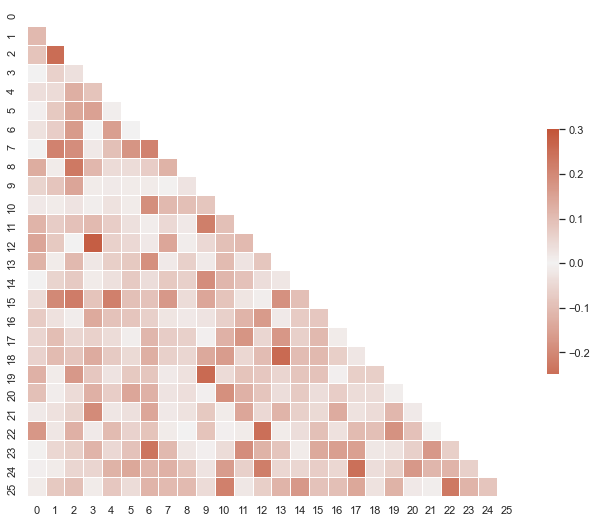

In [71]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

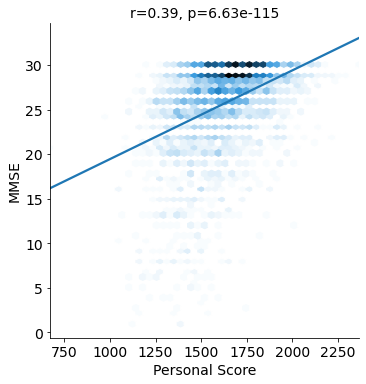

In [3]:
# Correlation between Personal Scores and MMSE
import datasets
import numpy as np
import draw_results
centers = datasets.load_centers_all()
personal_scoress = []
MMSEs = []

for center in centers:
    tmp_ps, *_ = center.get_csv_values(prefix='neurocombat_gmv/{}.csv')
    tmp_ps = np.reshape(tmp_ps, (-1, 246))
    tmp_ps = np.mean(tmp_ps, axis=1).tolist()

    tmp_mmse, _ = center.get_MMSEs()
    tmp_mmse = np.reshape(tmp_mmse, (-1)).tolist()

    personal_scoress += tmp_ps
    MMSEs += tmp_mmse
draw_results.plot_correlation_joint(personal_scoress, MMSEs, x_label='Personal Score', y_label='MMSE')